<a href="https://colab.research.google.com/github/AyushBherwani1998/DeepLearningModels/blob/master/tf_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Size of training data set  153600000

First Image of Training Set


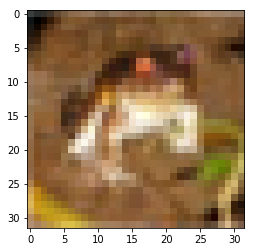


Training data set shape (50000, 32, 32, 3)

Training data set Lable shape (50000, 1)


In [0]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.cifar10.load_data()
print("Size of training data set ",train_images.size)

print("\nFirst Image of Training Set")
plt.figure()
plt.imshow(train_images[0])
plt.show()

print("\nTraining data set Image shape",train_images.shape)
print("\nTraining data set Lable shape",train_labels.shape)


In [0]:
class_names = [
    "airplane", 										
    "automobile", 										
    "bird", 										
    "cat", 										
    "deer", 										
    "dog", 										
    "frog", 										
    "horse", 										
    "ship", 										
    "truck"]

train_labels = train_labels.flatten()

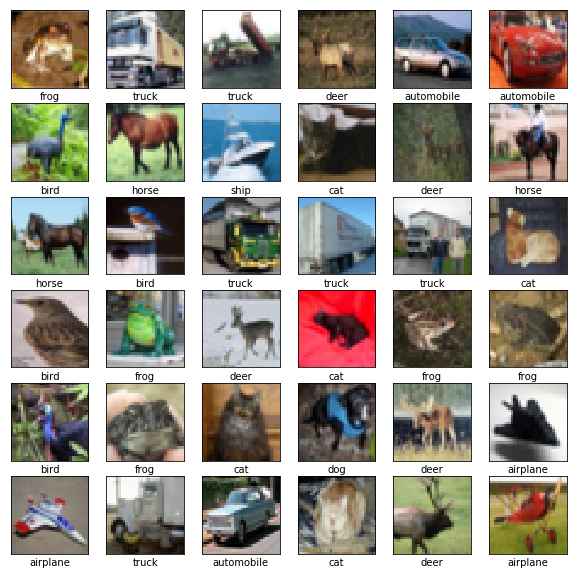

In [0]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(rate=0.3),                         
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [0]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 1.4416 - acc: 0.4813
Epoch 2/50
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.0646 - acc: 0.6250
Epoch 3/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.9178 - acc: 0.6783
Epoch 4/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.8198 - acc: 0.7103
Epoch 5/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.7386 - acc: 0.7392
Epoch 6/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.6714 - acc: 0.7632
Epoch 7/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.6065 - acc: 0.7869
Epoch 8/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.5528 - acc: 0.8043
Epoch 9/50
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.5054 - acc: 0.8202
Epoch 10/50
50000/50000 [==============================] - 108s 2ms/sampl

In [0]:

test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 600us/sample - loss: 2.1844 - acc: 0.6941


In [0]:
predictions = model.predict(test_images)

In [0]:
class_names[np.argmax(predictions[1904])]

'automobile'

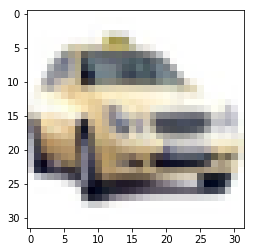

In [0]:
plt.figure()
plt.imshow(test_images[1904])
plt.show()